In [1]:
# Random Forest Classification

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from collections import Counter

from sklearn import preprocessing, svm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler() 

In [3]:
columns_new=['Site', 
             'EVI (3 Years Before)', 'NDVI (3 Years Before)', 'FPAR (3 Years Before)', 'LAI (3 Years Before)', 
          'LST Day (3 Years Before)', 'LST Night (3 Years Before)', 'EVI (2 Years Before)', 'NDVI (2 Years Before)', 
          'FPAR (2 Years Before)', 'LAI (2 Years Before)', 'LST Day (2 Years Before)','LST Night (2 Years Before)', 
          'EVI (1 Year Before)', 'NDVI (1 Year Before)', 'FPAR (1 Year Before)', 'LAI (1 Year Before)', 
          'LST Day (1 Year Before)', 'LST Night (1 Year Before)',
       'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'Date', '_classes']

In [4]:
df = pd.read_csv("Data/wildfire_classes1.csv").dropna()
df.columns = columns_new

In [5]:
#df['_classes'] = pd.qcut(df.FIRE_SIZE, 3,
 #                     labels=['1', '2', '3']) #, '4', '5', '6', '7', '8', '9', '10'

In [6]:
df['_classes'].value_counts()

1    680
0    646
Name: _classes, dtype: int64

In [7]:
xlist = ['EVI (3 Years Before)', 'NDVI (3 Years Before)', 'FPAR (3 Years Before)', 'LAI (3 Years Before)', 
         'LST Day (3 Years Before)', 'LST Night (3 Years Before)', 'EVI (2 Years Before)', 'NDVI (2 Years Before)', 
          'FPAR (2 Years Before)', 'LAI (2 Years Before)', 'LST Day (2 Years Before)','LST Night (2 Years Before)', 
          'EVI (1 Year Before)', 'NDVI (1 Year Before)', 'FPAR (1 Year Before)', 'LAI (1 Year Before)', 
          'LST Day (1 Year Before)', 'LST Night (1 Year Before)' 
         ,'LATITUDE', 'LONGITUDE'
    ]

ylist = ['_classes']

In [8]:
dfG = df.loc[df['FIRE_SIZE_CLASS'] == 'G'][0:-34]
dfA = df.loc[df['FIRE_SIZE_CLASS'] == 'A'][29:]
dfB = df.loc[df['FIRE_SIZE_CLASS'] == 'B'] #[0:17]
dfC = df.loc[df['FIRE_SIZE_CLASS'] == 'C'] #0:17]
dfD = df.loc[df['FIRE_SIZE_CLASS'] == 'D'] #[0:17]
dfE = df.loc[df['FIRE_SIZE_CLASS'] == 'E'] #[0:17]
dfF = df.loc[df['FIRE_SIZE_CLASS'] == 'F'] #[0:17]
df1 = pd.concat([dfG, dfA, dfB, dfC, dfD, dfE, dfF]).sample(frac=1)
df1

,Site,EVI (3 Years Before),NDVI (3 Years Before),FPAR (3 Years Before),LAI (3 Years Before),LST Day (3 Years Before),LST Night (3 Years Before),EVI (2 Years Before),NDVI (2 Years Before),FPAR (2 Years Before),...,FPAR (1 Year Before),LAI (1 Year Before),LST Day (1 Year Before),LST Night (1 Year Before),LATITUDE,LONGITUDE,FIRE_SIZE,FIRE_SIZE_CLASS,Date,_classes
1029,NOG32,0.058368,0.078459,0.017634,-0.061394,6.802082,2.295243,0.062134,0.080793,0.016707,...,0.045034,0.101191,4.202712,1.607264,38.608950,-122.628790,36807.00,G,10/8/2017,1
1247,840,0.205074,0.422608,0.511226,1.491617,277.199351,268.273769,0.214533,0.426391,0.428025,...,0.516925,1.638907,273.775998,265.404107,64.680000,-146.580000,87154.40,G,1,1
184,212,0.227523,0.389916,0.335603,0.650606,306.570746,280.836522,0.265802,0.428148,0.385364,...,0.281975,0.510884,311.781549,281.747812,37.170250,-120.102050,9.00,B,1,0
806,GBG40,-0.008651,-0.044074,-0.040365,-0.103019,0.133004,-2.596384,-0.007050,-0.039609,-0.039321,...,-0.011965,-0.049240,3.879246,-0.676603,38.094700,-114.101100,6270.00,G,6/1/2012,1
454,SWC13,0.061945,0.107868,0.079269,0.330799,1.673565,1.061381,0.053721,0.107854,0.071541,...,0.061852,0.163718,2.639807,2.303169,33.840210,-94.388340,98.00,C,3/23/2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,NRG44,-0.065006,-0.131215,-0.079145,-0.250834,-3.493524,-3.128785,-0.064884,-0.137631,-0.058605,...,-0.047929,-0.232217,1.508798,0.745940,47.590556,-102.674722,9500.00,G,9/19/2012,1
1127,NOG82,0.077284,0.160326,0.125527,0.556052,2.891121,3.465343,0.081933,0.161451,0.128750,...,0.148925,0.763244,1.089409,2.744244,38.408900,-122.470000,56556.00,G,10/8/2017,1
336,SAB11,0.013944,0.045211,0.054038,0.247881,1.913840,2.194078,0.011985,0.043166,0.037092,...,0.063342,0.315106,2.990002,1.838440,32.958643,-83.757445,9.97,B,7/1/2007,0
518,SAC21,0.036662,0.085045,0.113681,0.838645,3.154615,3.060500,0.030722,0.086498,0.103727,...,0.135504,0.971776,2.899293,3.895985,32.320165,-81.182139,99.80,C,3/24/2011,0


In [9]:
X = df1.loc[:, xlist]
y = df1.loc[:, ylist]

In [10]:
from sklearn.ensemble import RandomForestClassifier
train_index1 = []
test_index1 = []
train = []
acc = []
feat = []
kf = KFold(n_splits=5, shuffle = True, random_state = 45)
kf.get_n_splits(X)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, y_train.values)
    
    train.append(clf.score(X_train, y_train))
    train_index1.append(train_index)
    test_index1.append(test_index)
    
    y_pred = clf.predict(X_test)
    
    #sel = SelectFromModel(clf)
    #sel.fit(X_train, y_train.values.ravel())
    #print(sel.get_support())
    #selected_feat = X_train.columns[(sel.get_support())]
    #feat += selected_feat.values.tolist()
    #print(selected_feat.values)
    
    acc.append(accuracy_score(y_pred , y_test))

print("Test Max ", max(acc))
#print("Corresponding Train ", train[acc.index(max(acc))])
#print("Train Index ", train_index1[acc.index(max(acc))])
#print("Test Index ", test_index1[acc.index(max(acc))])
print("Test Mean ", mean(acc))

C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\3899753625.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\3899753625.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\3899753625.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\3899753625.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  c

Test Max  0.8656126482213439
Test Mean  0.8400715226802185


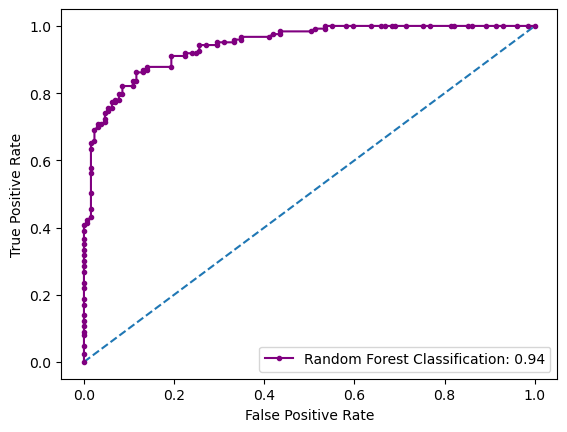

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classification: ' + str(lr_auc)[:4], color = 'purple')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc = 'lower right')
# show the plot
pyplot.show()

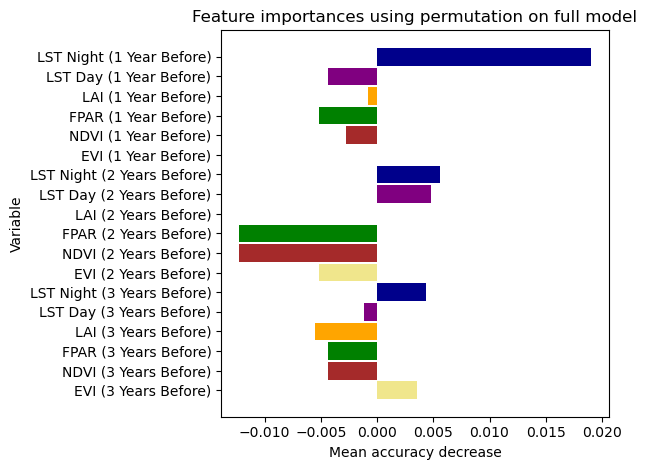

In [12]:
from sklearn.inspection import permutation_importance
colors = ['khaki', 'brown', 'green', 'orange', 'purple', 'darkblue']
Labels = ['EVI (3 Years Before)', 'NDVI (3 Years Before)', 'FPAR (3 Years Before)', 'LAI (3 Years Before)', 
          'LST Day (3 Years Before)', 'LST Night (3 Years Before)', 'EVI (2 Years Before)', 'NDVI (2 Years Before)', 
          'FPAR (2 Years Before)', 'LAI (2 Years Before)', 'LST Day (2 Years Before)','LST Night (2 Years Before)', 
          'EVI (1 Year Before)', 'NDVI (1 Year Before)', 'FPAR (1 Year Before)', 'LAI (1 Year Before)', 
          'LST Day (1 Year Before)', 'LST Night (1 Year Before)']

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean[0:-2], index=Labels)

#fig, ax = plt.subplots()
#ax.barh(Labels, feat_importances, color = colors, height = 0.9)
#ax.set_xlabel('Feature Importance (MDI)')
#ax.set_ylabel('Variable')
#plt.show()

fig, ax = plt.subplots()
ax.barh(Labels, forest_importances, color = colors, height = 0.9)
#forest_importances.plot.barh(yerr=result.importances_std, ax=ax, color = colors)
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
ax.set_ylabel("Variable")
fig.tight_layout()
plt.show()

In [25]:
import itertools
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Purples'))
    #plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90, va='center')

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() /2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

Normalized confusion matrix


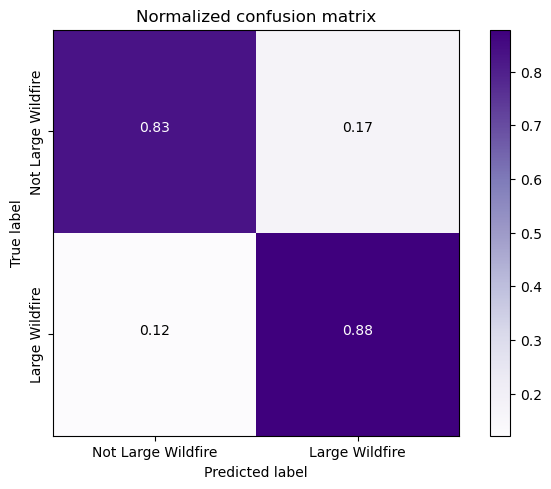

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ["Not Large Wildfire", "Large Wildfire"]

# Plot normalized confusion matrix
plt.figure()
generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [15]:
X_new = df1.loc[:, xlist]
y_new = df1.loc[:, ylist]

In [16]:
from sklearn.ensemble import RandomForestClassifier
train_index1 = []
test_index1 = []
train = []
acc = []
feat = []
kf = KFold(n_splits=10, shuffle = True, random_state = 600)
kf.get_n_splits(X_new)
for i, (train_index, test_index) in enumerate(kf.split(X_new)):
    X_train = X_new.iloc[train_index]
    y_train = y_new.iloc[train_index]
    
    X_test = X_new.iloc[test_index]
    y_test = y_new.iloc[test_index]
    
    clf = RandomForestClassifier(n_estimators = 500) 
    clf.fit(X_train, y_train.values)
    
    train.append(clf.score(X_train, y_train))
    train_index1.append(train_index)
    test_index1.append(test_index)
    
    y_pred = clf.predict(X_test)
    
    #sel = SelectFromModel(clf)
    #sel.fit(X_train, y_train.values.ravel())
    #print(sel.get_support())
    #selected_feat = X_train.columns[(sel.get_support())]
    #feat += selected_feat.values.tolist()
    #print(selected_feat.values)
    
    acc.append(accuracy_score(y_pred , y_test))

print("Test Max ", max(acc))
#print("Corresponding Train ", train[acc.index(max(acc))])
#print("Train Index ", train_index1[acc.index(max(acc))])
#print("Test Index ", test_index1[acc.index(max(acc))])
print("Test Mean ", mean(acc))

C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\2111745036.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\2111745036.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\2111745036.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train.values)
C:\Users\nagra\AppData\Local\Temp\ipykernel_10352\2111745036.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  c

Test Max  0.9212598425196851
Test Mean  0.8503249593800775


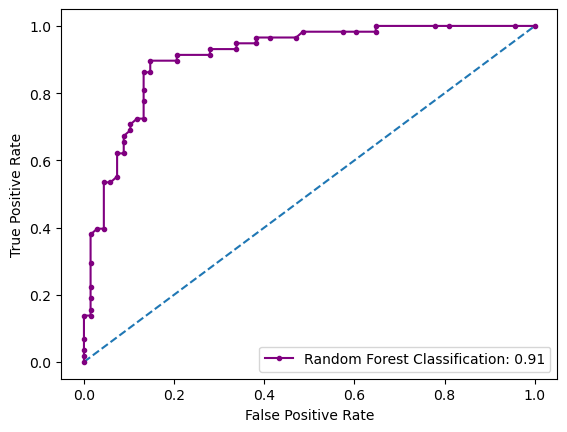

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classification: ' + str(lr_auc)[:4], color = 'purple')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc = 'lower right')
# show the plot
pyplot.show()

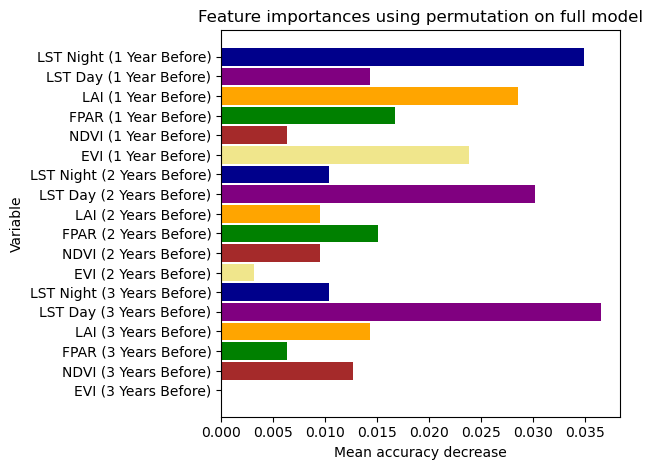

In [18]:
from sklearn.inspection import permutation_importance
colors = ['khaki', 'brown', 'green', 'orange', 'purple', 'darkblue']
Labels = ['EVI (3 Years Before)', 'NDVI (3 Years Before)', 'FPAR (3 Years Before)', 'LAI (3 Years Before)', 
          'LST Day (3 Years Before)', 'LST Night (3 Years Before)', 'EVI (2 Years Before)', 'NDVI (2 Years Before)', 
          'FPAR (2 Years Before)', 'LAI (2 Years Before)', 'LST Day (2 Years Before)','LST Night (2 Years Before)', 
          'EVI (1 Year Before)', 'NDVI (1 Year Before)', 'FPAR (1 Year Before)', 'LAI (1 Year Before)', 
          'LST Day (1 Year Before)', 'LST Night (1 Year Before)']

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean[0:-2], index=Labels)

#fig, ax = plt.subplots()
#ax.barh(Labels, feat_importances, color = colors, height = 0.9)
#ax.set_xlabel('Feature Importance (MDI)')
#ax.set_ylabel('Variable')
#plt.show()

fig, ax = plt.subplots()
ax.barh(Labels, forest_importances, color = colors, height = 0.9)
#forest_importances.plot.barh(yerr=result.importances_std, ax=ax, color = colors)
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
ax.set_ylabel("Variable")
fig.tight_layout()
plt.show()

Normalized confusion matrix


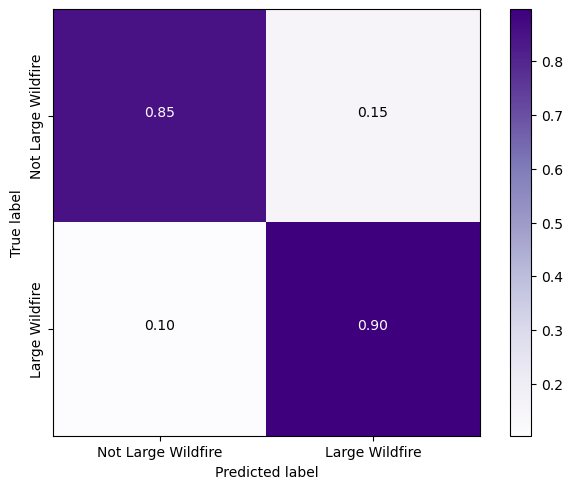

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ["Not Large Wildfire", "Large Wildfire"]

# Plot normalized confusion matrix
plt.figure()
generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()